# Unsupervised Learning

*Contribution from Zain Hasan*

Today we'll be looking at different types of Learning in ML, unsupervised learning use cases as well as types of clustering (kMeans, Hierarchical, DBScan)

# What is  Machine Learning?
### 1. ML is a technique where a certain computer program accepts inputs and predicts a target variable. 
### 2. The way this is achieved is by training the algorithm on a sample of dataset
### 3. There is cost/penalty function which is monitored as it is moving through the data points.
### 4. The algorithm tries to reduce the cost/penalty function as much as possible.
### 5. By doing so the algorithm gets closer to predicting correct values

# This type of machine learning falls under Supervised Machine Learning

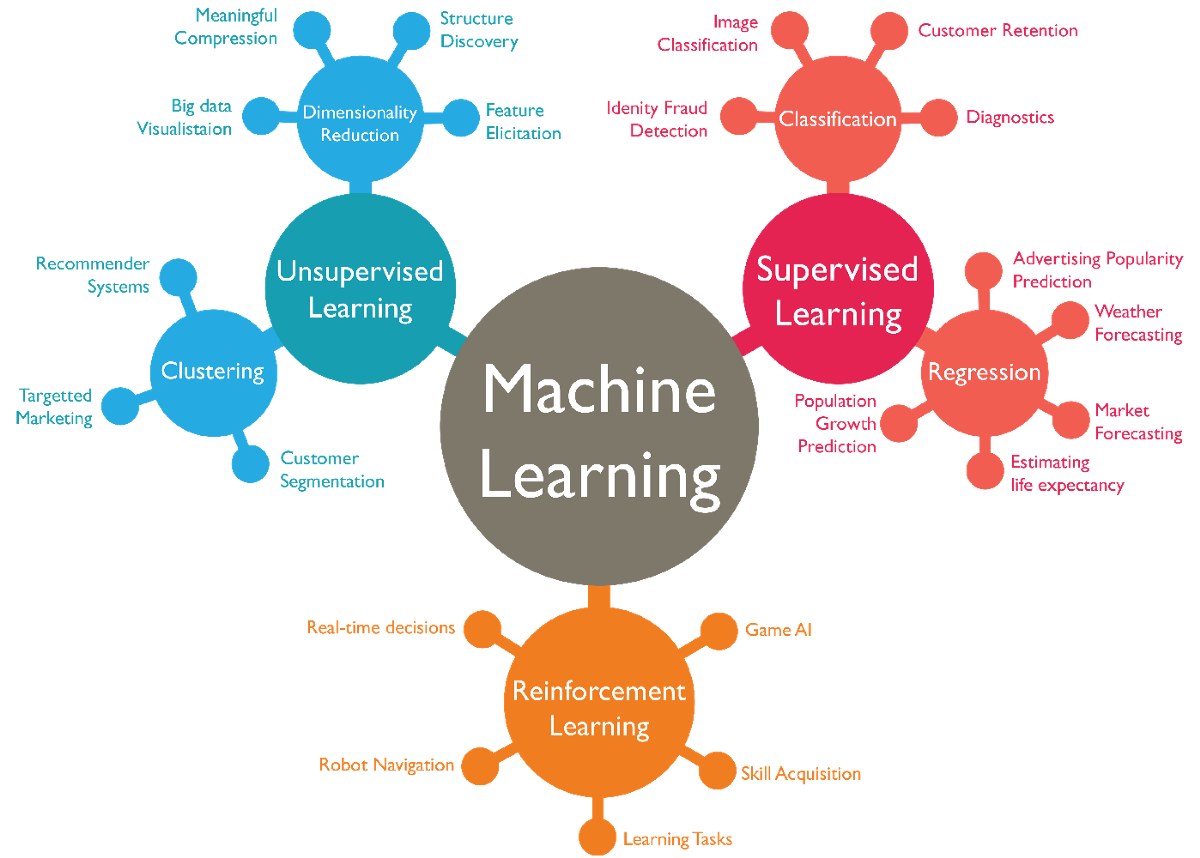

In [15]:
from IPython import display
display.Image("https://7wdata.be/wp-content/uploads/2020/06/1FUZS9K4JPqzfXDcC83BQTw.png", width = 600, height = 400)


# Unsupervised Learning 
* The art of drawing inferences from data which does not have <b>labels (target,Y)</b>. 
* We are not trying to predict a label, we are trying to group data together on some similar attributes. ie. **Clustering**

# <u> Applications in Industry of Unsupervised Learning/Clustering:</u>

Being able to identify similarities and extract **actionable business insights** in a large dataset is ***very*** valuable!



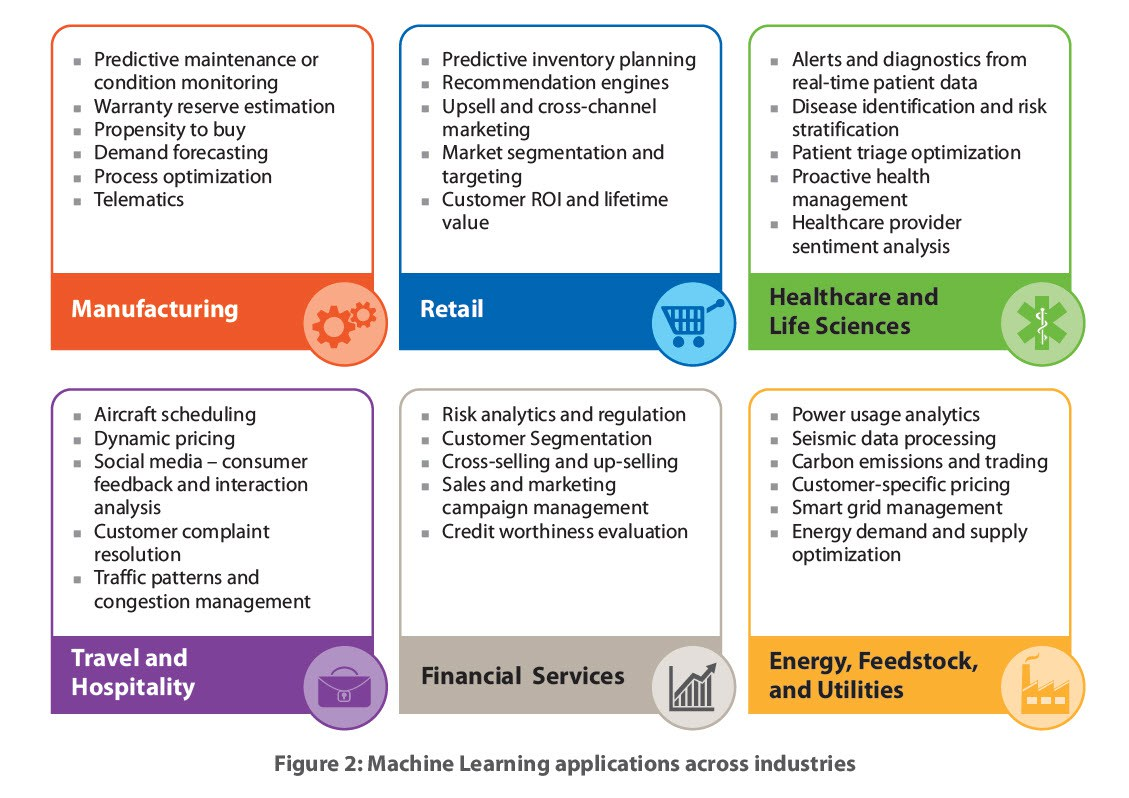

In [ ]:
display.Image("https://whatsthebigdata.files.wordpress.com/2016/07/machine-learning-apps.jpg", width = 600, height = 400)


# Clustering
* Creating groups out of data points based on closeness.
* Dividing the data into clusters can be on the basis of centroids, distributions, densities, etc


# Exploring Different Types of Clustering Algorithms


## <u>1. K-Means Clustering</u>

### 1. The motivation and purpose of the technique 
### 2. Explanation of the k-means clustering and EM algorithm - How it works
### 3. Shortcomings of the Algorithm
### 4. Show example code
### 5. Guided Clustering Data Science Project


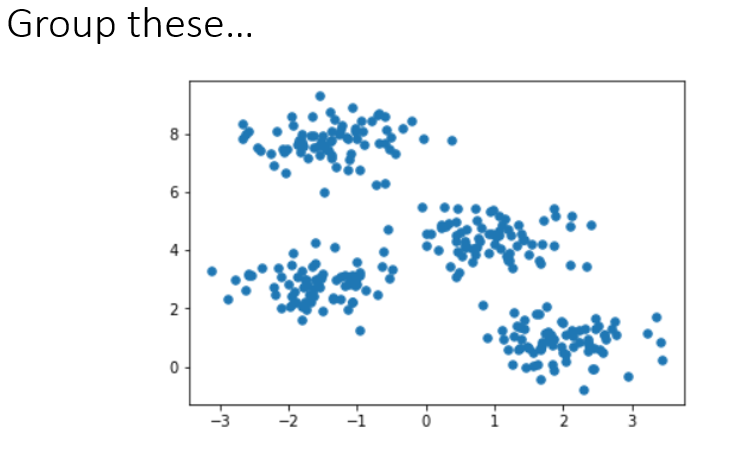

# Humans are very good as identifying similarities in data ... even with very little context.

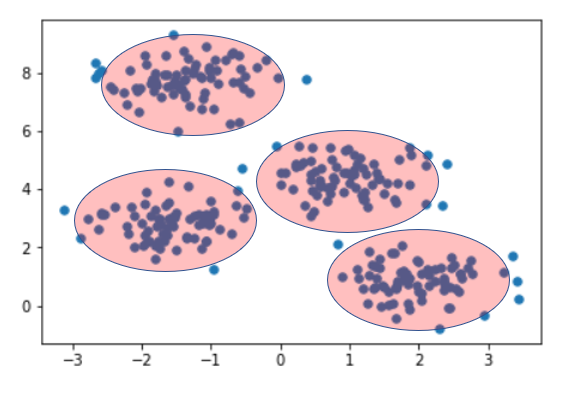

# Can we develop techniques that allow computers to identify similarities in ***very large datasets*** with ***little to no context*** aswell?

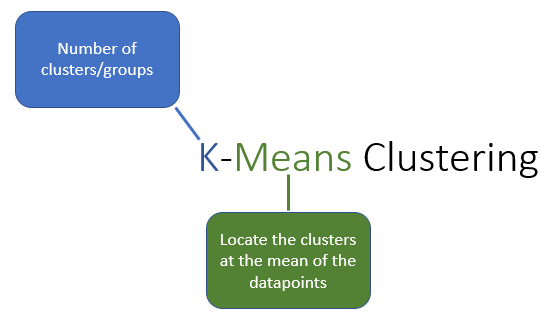

# K-Means Clustering

**K-Means Clustering** is a *unsupervised* clustering machine learning algorithm. It finds clusters in data based on the data attributes alone (not the labels).

K-Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

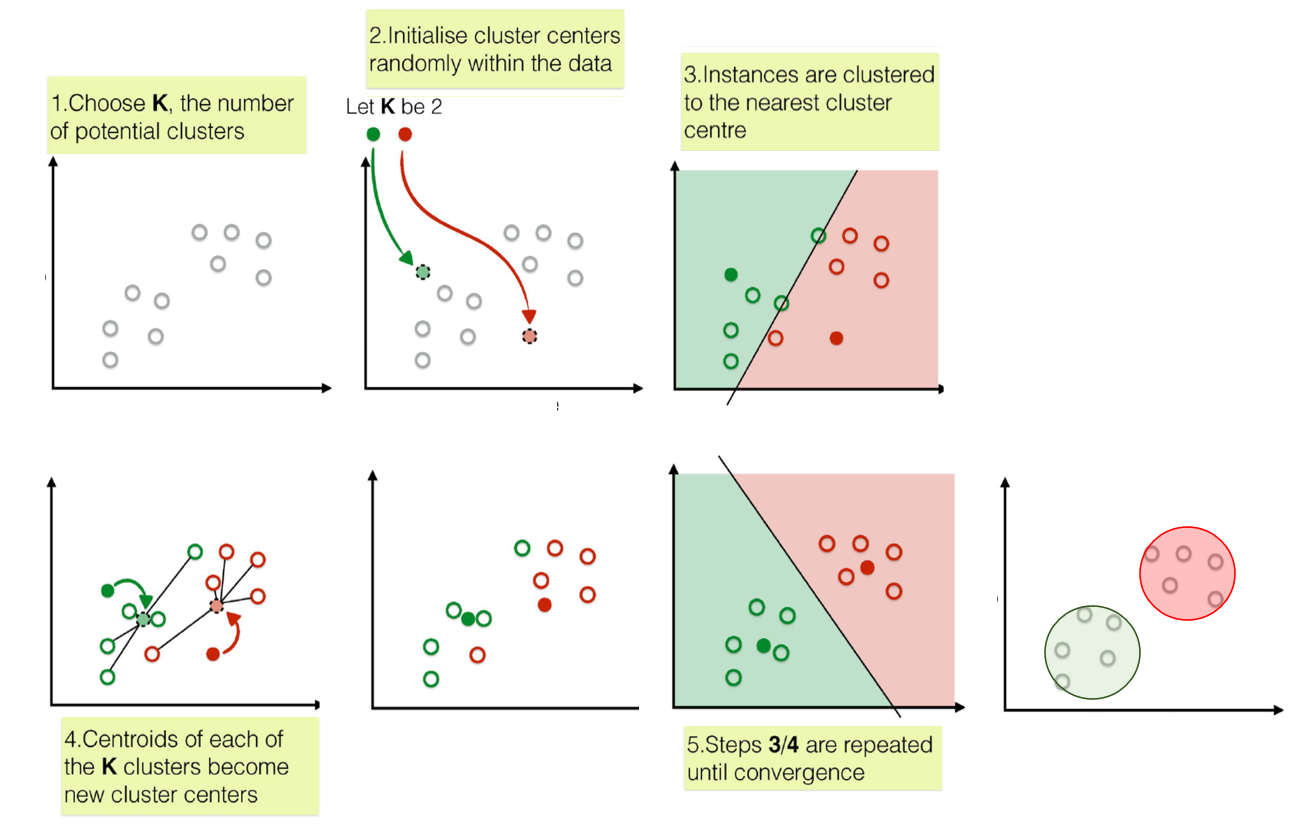

### How KMeans works - Activity - (5 mins)
Go to the link and try choosing centroids to see how kmeans works visually:https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Follow-up Question: Was it easy to decide clusters always?


## This is also known as the Expectation Maximization (EM) algorithm. 

## <u>Some Short-comings of the algorithm:</u>

### 1. The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

### 2. Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted. - We will see other algorithms that do not need this specification


#### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means

%matplotlib inline

## Let's take a look at how KMeans operates on a simple cluster. To emphasize that this is unsupervised, we'll not plot the color of the clusters:

In [2]:
# Generate data to cluster
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples = 3000,  # number of datapoints to generate
    centers = 4, # How many cluster centers
    cluster_std  = 0.60, # Standard deviation for each cluster
    random_state = 0 # Set seed so clusters are same for everyone
)

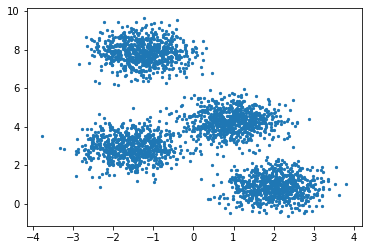

In [3]:
# Plot the generated data
plt.scatter(X[:,0],X[:,1],s=5)

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

### Apply K-Means Algorithm

In [4]:
#### Build model for prediction
# There are 4 clusters, so we will build a model for 4 clusters.
model = KMeans(4) # Since there are 4 clusters

In [5]:
# Train model
model.fit(X)   #This is where the EM algorithm is iterating

KMeans(n_clusters=4)

In [6]:
# Make predictions
y_pred = model.predict(X)
print(y_pred)

[1 0 2 ... 1 1 2]


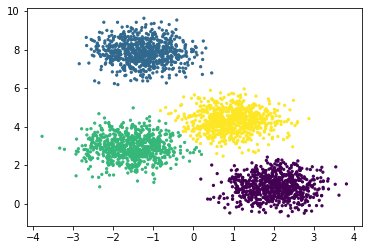

In [7]:
# Plot predicted clusters
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5)

The KMeans algorithm identifies the four cluster of points in a manner very similar to what we would do by eye!

## In Class Activity: Use K Means Clustering on the Linner rudd Dataset

In [8]:
#Load Data
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')

data = load_linnerud()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


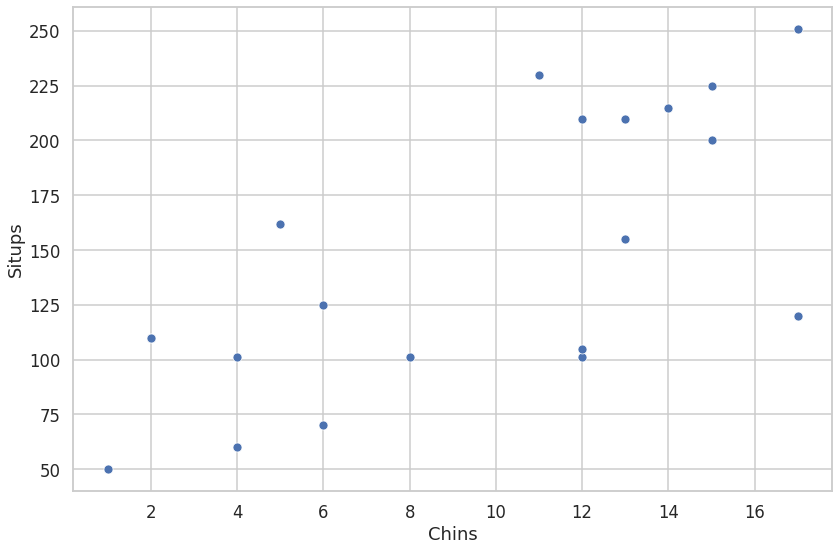

In [9]:
#Visualize Chin Ups and Situps Columns
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df['Chins'], y=df['Situps'], data=df, ax=ax)

fig.tight_layout()

In [10]:
#Create Model
model = KMeans(2)

In [11]:
# Train model
model.fit(df[['Chins', 'Situps']])   #This is where the EM algorithm is iterating

KMeans(n_clusters=2)

In [12]:
# Make predictions
y_pred = model.predict(df[['Chins', 'Situps']])
print(y_pred)

[1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0]


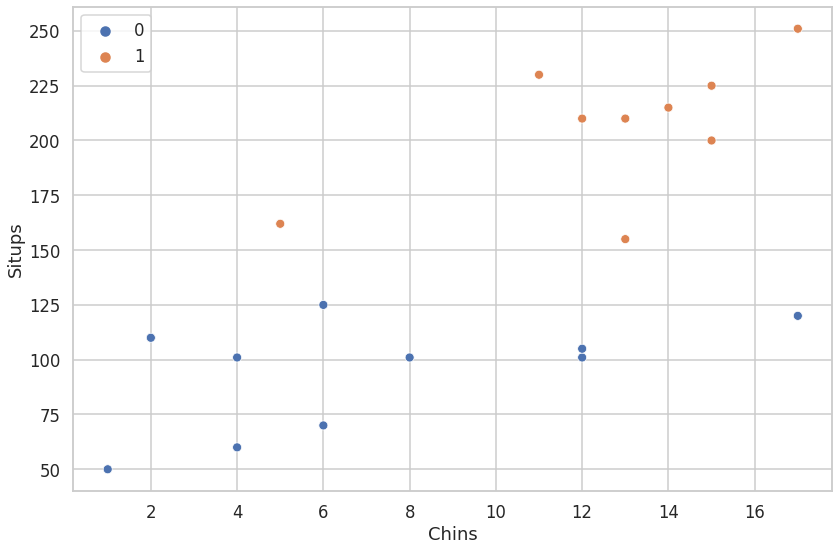

In [13]:
#Visualize Results
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df['Chins'], y=df['Situps'], hue=y_pred, data=df, ax=ax)

fig.tight_layout()

## 2. Hierchical Clustering
In the dendrogram, each leaf corresponds to one object. As we move
up the tree, objects that are similar to each other are combined into branches, which
are themselves fused at a higher height.

The height of the fusion, provided on the vertical axis, indicates the (dis)similarity/distance
between two objects/clusters. The higher the height of the fusion, the less similar the
objects are

One of the problems with hierarchical clustering is that, it does not tell us how many
clusters there are, or where to cut the dendrogram to form clusters

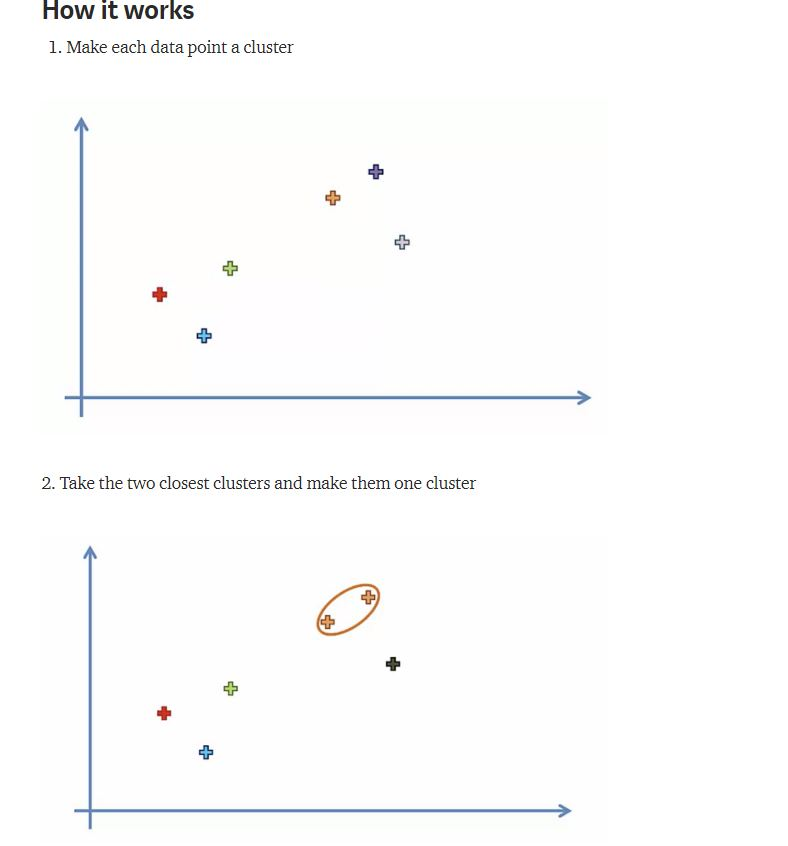

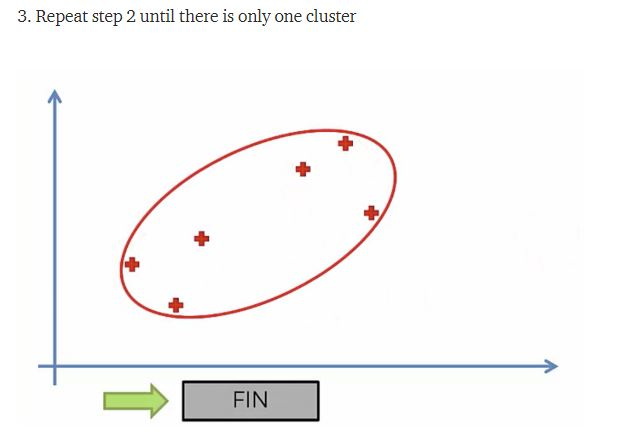

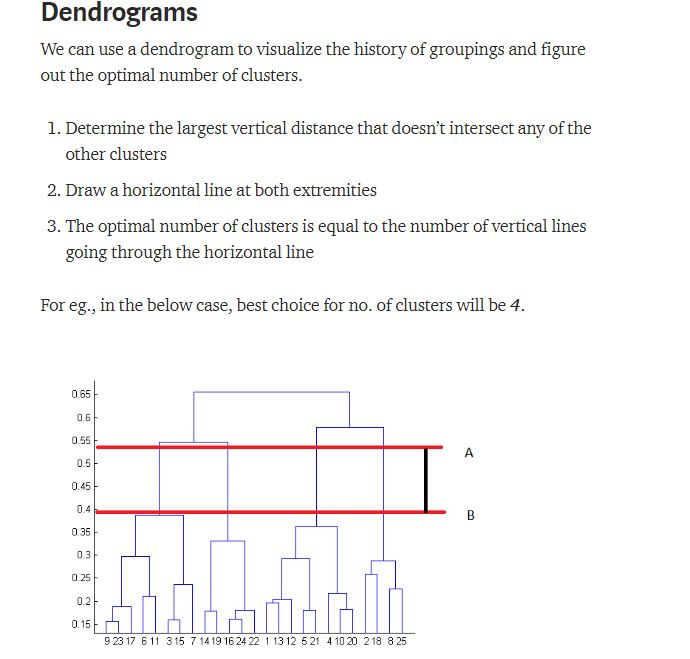

### Linkage Criteria
* How are you going to calculate distance between two smallest clusters and group them based on min distance
* There isnt a single way to do this

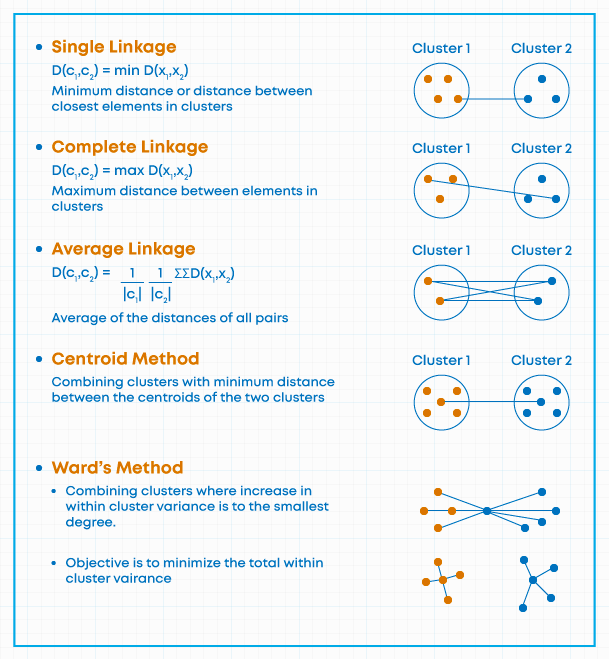

In [16]:
display.Image("https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130934/june-30-hierarchical-clustering-infograph-for-blog-8.png", width = 500, height = 500)


## Clustering Demo using <code>iris</code> dataset

In [17]:
from sklearn import datasets

iris = datasets.load_iris()

In [18]:
# View the data first 10 samples
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

# View the <code>target</code> labels.

In [19]:
iris.target #hidden

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(iris.data)

In [21]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).


In [22]:
from sklearn.metrics import adjusted_rand_score

single_ar_score = adjusted_rand_score(iris.target, single_pred)

# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

Which algorithm has higher <code> adjusted_rand_score</code>

In [23]:
print( "Scores: \nSingle:", single_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Single: 0.5637510205230709 
Complete:  0.6422512518362898 
Average:  0.7591987071071522


To visualize the cluster result we will use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [24]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'average'

linkage_matrix = linkage(iris.data, linkage_type)

#### Plot <code>linkage</code> matrix using <code>dendogram</code> in <code>scipy</code>

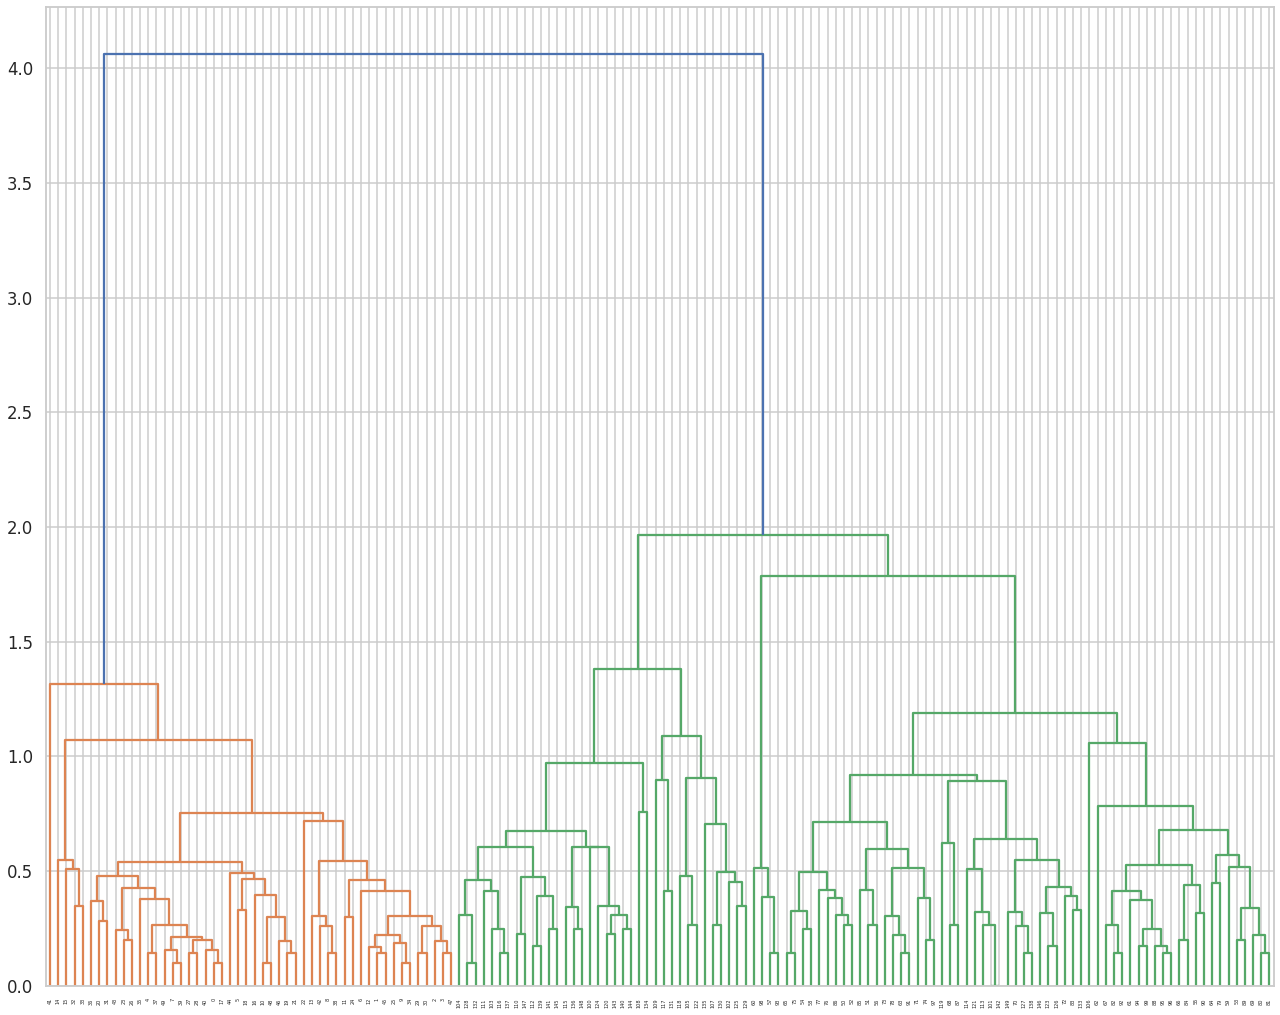

In [25]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

# In Class Guided Activity: Crime Detection

We will be using Clustering to identify major neighbourhoods in Toronto where crime has occured in 2021. Dataset offered by Toronto Police MCI open data portal.


In [26]:
#Import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [27]:
#Load Data
df = pd.read_csv('Major_Crime_Indicators.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.859955e+06,5.424372e+06,110,GO-20141625305,D23,2014/03/02 05:00:00+00,2014/03/02 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,...,2,61,Sunday,8,Assault,1,West Humber-Clairville,-79.590332,43.734013,1
1,-8.861110e+06,5.424036e+06,188,GO-20141272968,D23,2013/12/24 05:00:00+00,2014/01/03 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1610,...,24,358,Tuesday,22,Robbery,1,West Humber-Clairville,-79.600701,43.731834,2
2,-8.861120e+06,5.417043e+06,287,GO-20141284361,D23,2013/01/05 05:00:00+00,2014/01/05 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1430,...,5,5,Saturday,4,Assault,1,West Humber-Clairville,-79.600794,43.686423,3
3,-8.861463e+06,5.425856e+06,384,GO-20141292177,D23,2013/12/31 05:00:00+00,2014/01/06 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2120,...,31,365,Tuesday,21,Break and Enter,1,West Humber-Clairville,-79.603876,43.743642,4
4,-8.859522e+06,5.418688e+06,438,GO-20141297201,D23,2014/01/03 05:00:00+00,2014/01/07 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2120,...,3,3,Friday,10,Break and Enter,1,West Humber-Clairville,-79.586443,43.697108,5


In [28]:
#Clean Data
df.dropna(inplace = True)
df = df[df['occurrenceyear'] == 2021]

# Our Data Looks nice but we want it to look like this:
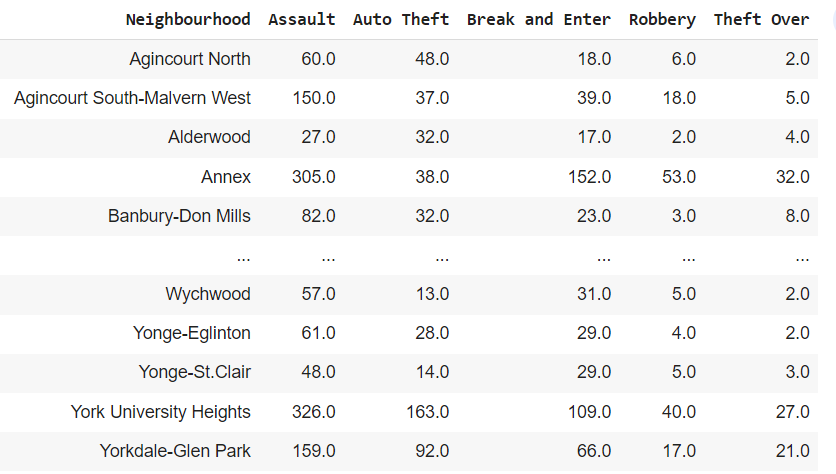

In [29]:
#Show GroupBy
df2 = df.groupby(['Neighbourhood', 'MCI']).size()
df2

Neighbourhood       MCI            
Agincourt North     Assault             60
                    Auto Theft          48
                    Break and Enter     18
                    Robbery              6
                    Theft Over           2
                                      ... 
Yorkdale-Glen Park  Assault            159
                    Auto Theft          92
                    Break and Enter     66
                    Robbery             17
                    Theft Over          21
Length: 692, dtype: int64

In [30]:
#Groupby Object to Dataframe
out = df[['Neighbourhood','MCI']].value_counts().sort_index().reset_index()
out.head()

,Neighbourhood,MCI,0
0,Agincourt North,Assault,60
1,Agincourt North,Auto Theft,48
2,Agincourt North,Break and Enter,18
3,Agincourt North,Robbery,6
4,Agincourt North,Theft Over,2


In [31]:
#Pivot Table
crimes = out.pivot_table(0, 'Neighbourhood', 'MCI')
crimes.head()

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Neighbourhood,,,,,
Agincourt North,60.0,48.0,18.0,6.0,2.0
Agincourt South-Malvern West,150.0,37.0,39.0,18.0,5.0
Alderwood,27.0,32.0,17.0,2.0,4.0
Annex,305.0,38.0,152.0,53.0,32.0
Banbury-Don Mills,82.0,32.0,23.0,3.0,8.0


In [32]:
#Reset Index
crimes = crimes.reset_index()
crimes.head()

MCI,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,Agincourt North,60.0,48.0,18.0,6.0,2.0
1,Agincourt South-Malvern West,150.0,37.0,39.0,18.0,5.0
2,Alderwood,27.0,32.0,17.0,2.0,4.0
3,Annex,305.0,38.0,152.0,53.0,32.0
4,Banbury-Don Mills,82.0,32.0,23.0,3.0,8.0


In [33]:
# Before Running Clustering or any kind of model, it's important to scale our data
crimes.dropna(inplace=True)
cols = ['Assault',	'Auto Theft',	'Break and Enter',	'Robbery',	'Theft Over']
cols_scaled = ['Assault Scaled',	'Auto Theft Scaled',	'Break and Enter Scaled',	'Robbery Scaled',	'Theft Over Scaled']
scaler = StandardScaler()
crimes[cols_scaled] = scaler.fit_transform(crimes[cols])
crimes.head()

MCI,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Assault Scaled,Auto Theft Scaled,Break and Enter Scaled,Robbery Scaled,Theft Over Scaled
0,Agincourt North,60.0,48.0,18.0,6.0,2.0,-0.555528,-0.012957,-0.554217,-0.582469,-0.630240
1,Agincourt South-Malvern West,150.0,37.0,39.0,18.0,5.0,0.082717,-0.232757,-0.080232,0.048916,-0.301865
2,Alderwood,27.0,32.0,17.0,2.0,4.0,-0.789551,-0.332666,-0.576788,-0.792931,-0.411323
3,Annex,305.0,38.0,152.0,53.0,32.0,1.181917,-0.212775,2.470259,1.890456,2.653507
4,Banbury-Don Mills,82.0,32.0,23.0,3.0,8.0,-0.399513,-0.332666,-0.441363,-0.740316,0.026509


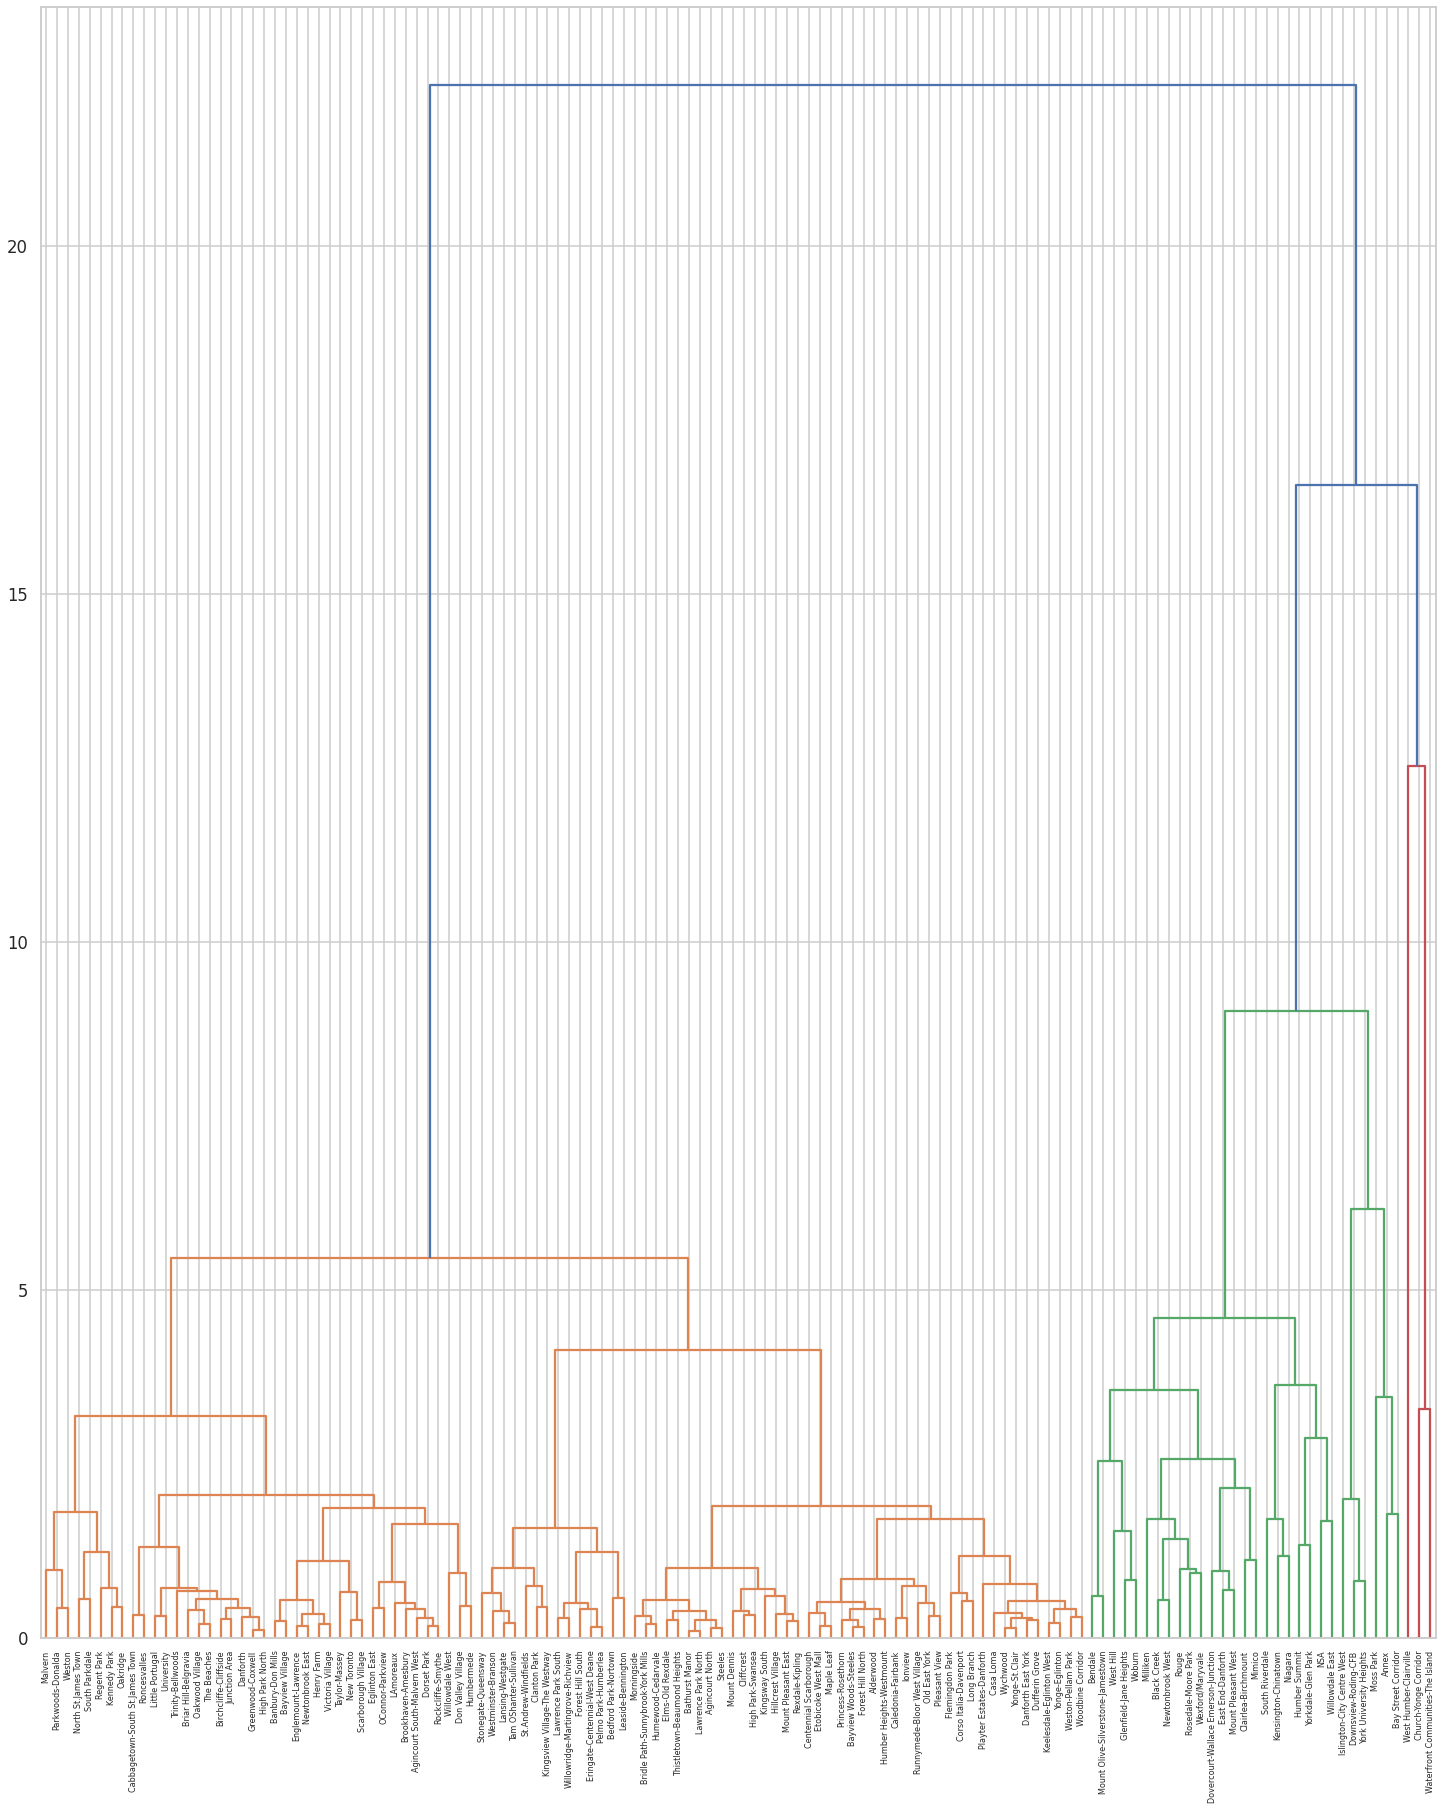

In [34]:
#Now that our data is prepped. Let's use a dendogram to pick out optimal number of clusters
linkage_type = 'ward'
df_new = crimes. iloc[:, 6:]
linkage_matrix = linkage(df_new, linkage_type)

plt.figure(figsize=(25,30))
labels = list(crimes['Neighbourhood'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [35]:
#Run Clustering
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
df_new = crimes. iloc[:, 6:]

clustering_model.fit(df_new)
label = clustering_model.labels_
print(label)

[1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2
 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 0 2 0 1 1 1 2 2 1 1 2 1 1 1 1 2 2]


In [36]:
#Adding cluster column from output of model
crimes['cluster'] = label
crimes.dropna(inplace = True)
crimes.head()

MCI,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Assault Scaled,Auto Theft Scaled,Break and Enter Scaled,Robbery Scaled,Theft Over Scaled,cluster
0,Agincourt North,60.0,48.0,18.0,6.0,2.0,-0.555528,-0.012957,-0.554217,-0.582469,-0.630240,1
1,Agincourt South-Malvern West,150.0,37.0,39.0,18.0,5.0,0.082717,-0.232757,-0.080232,0.048916,-0.301865,1
2,Alderwood,27.0,32.0,17.0,2.0,4.0,-0.789551,-0.332666,-0.576788,-0.792931,-0.411323,1
3,Annex,305.0,38.0,152.0,53.0,32.0,1.181917,-0.212775,2.470259,1.890456,2.653507,2
4,Banbury-Don Mills,82.0,32.0,23.0,3.0,8.0,-0.399513,-0.332666,-0.441363,-0.740316,0.026509,1


#Visualizing Results

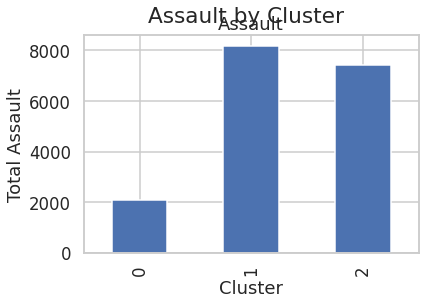

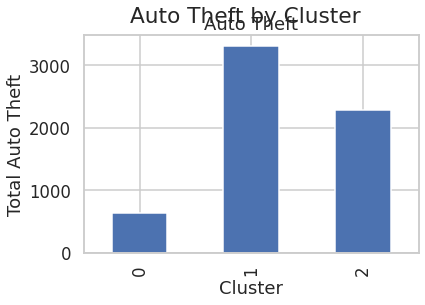

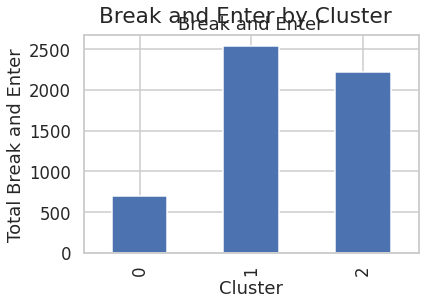

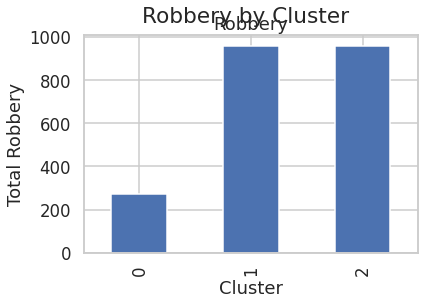

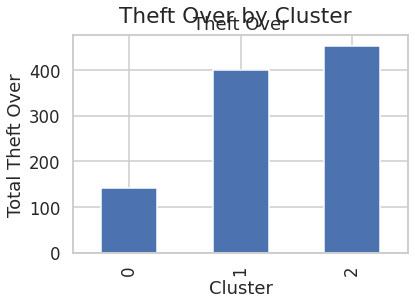

In [37]:
features = list(crimes.columns)[1:6]
for x in features:
  plt.figure()
  crimes.groupby(["cluster"])[x].sum().plot(kind="bar", title= x + ' by Cluster', ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

## According to the graph it looks like Cluster 1 had the most crime overall but don't be fooled, the clustering algorithm clustered neighbourhoods that had similar levels of crimes. So you could also say cluster 1 had the most amount of neighbourhoods with similar crime levels. Let's take a look at average crime per cluster.

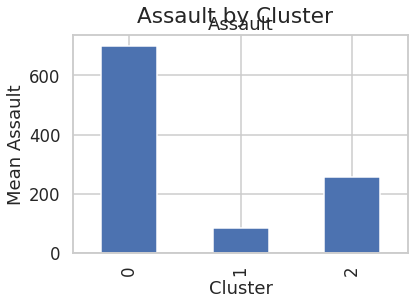

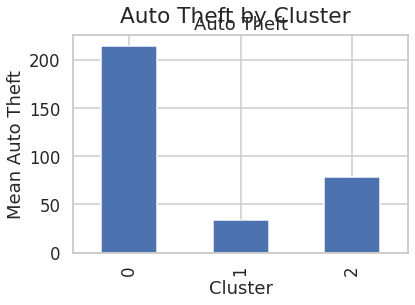

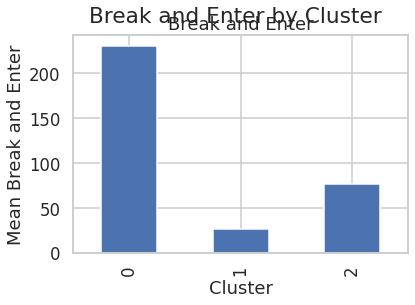

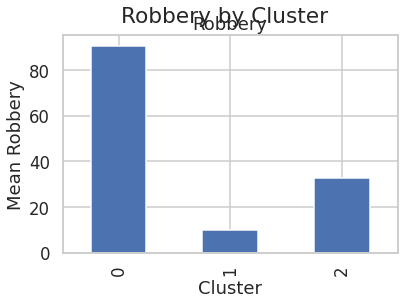

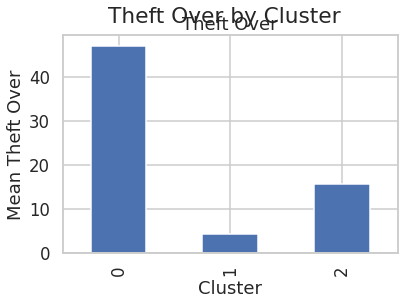

In [38]:
features = list(crimes.columns)[1:6]
for x in features:
  plt.figure()
  crimes.groupby(["cluster"])[x].mean().plot(kind="bar", title= x + ' by Cluster', ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

##Looks like Cluster 0 is especially dangerous on average looking at average crime rates. Let's take a look at the worst neighbourhoods in the cluster for each crime.

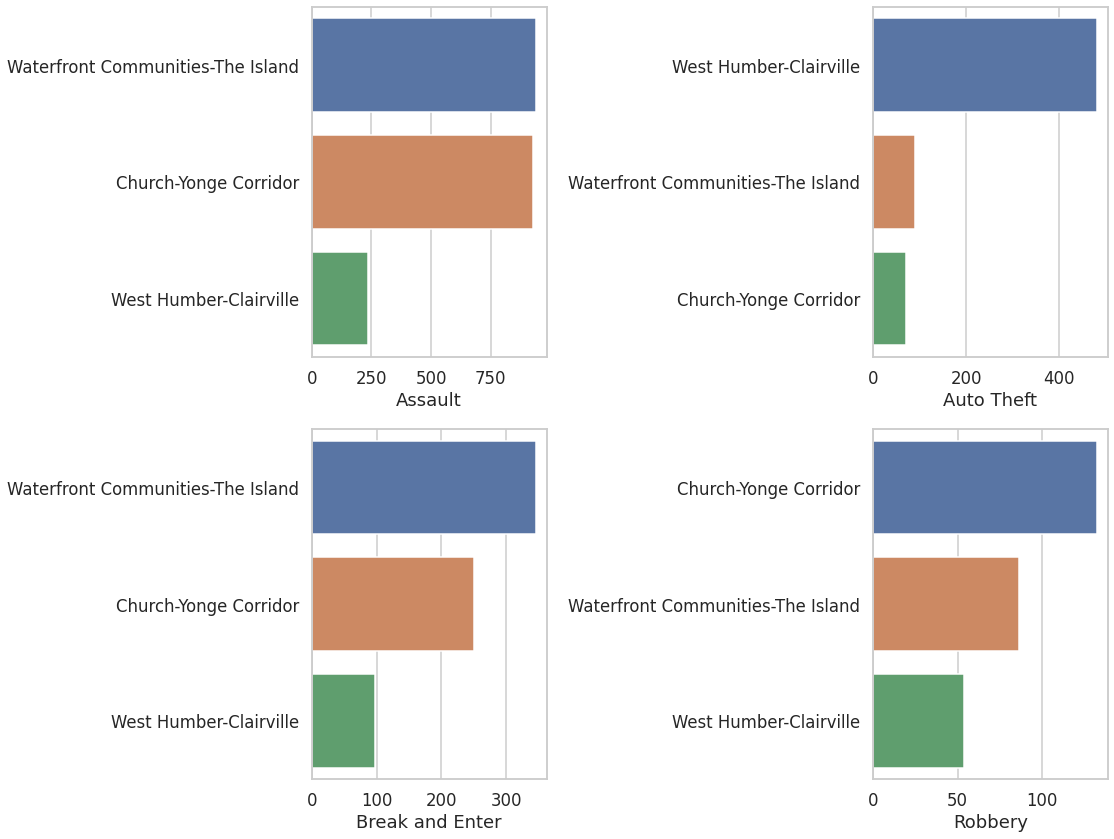

In [39]:
#Worst Neighbourhoods
cluster0 = crimes[crimes['cluster'] == 0.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster2 = cluster0.sort_values(by=features[i*2 + j], ascending=False)
        clustertop = cluster2.head()
        sns.barplot(y = 'Neighbourhood', x=features[i*2 + j], data=clustertop, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

# Looks like the worst neighbourhoods were in Downtown Toronto which makes sense since there is a higher concentration of people living there. Let's look at the safest neighbourhoods from cluster 1.

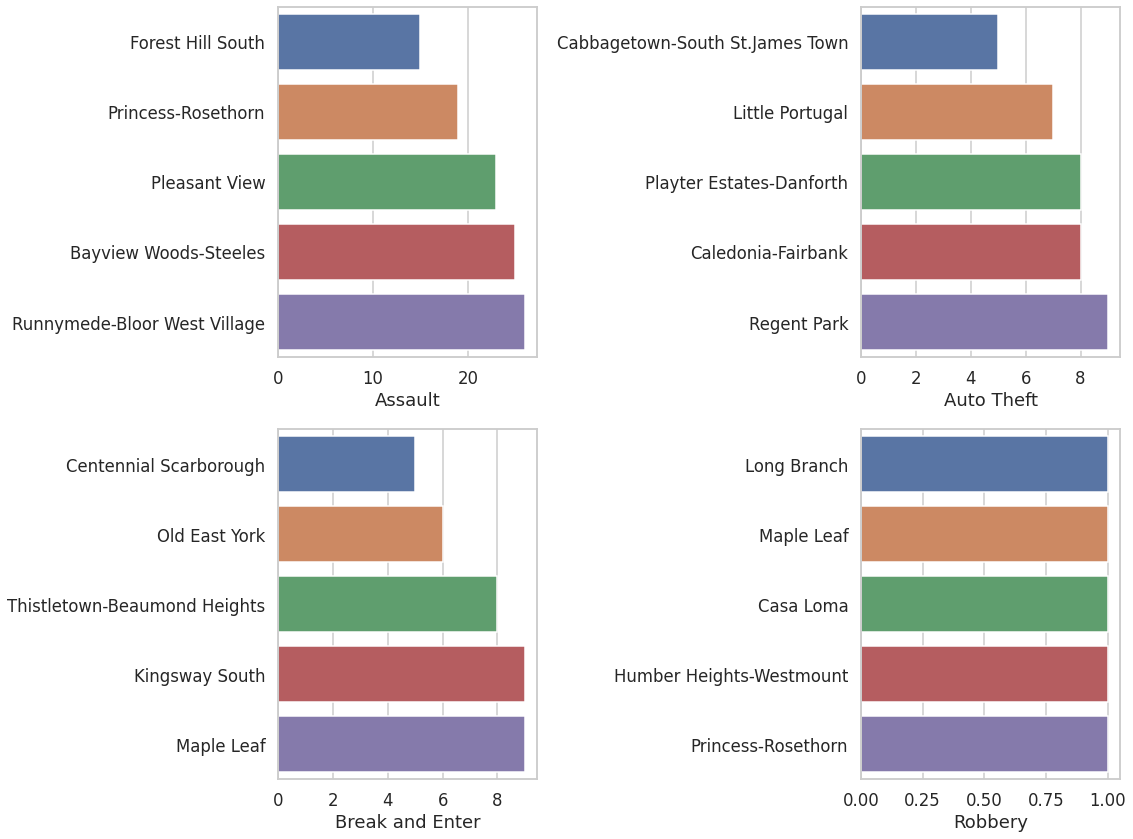

In [42]:
#Safest Neighbourhoods
cluster1 = crimes[crimes['cluster'] == 1.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster2 = cluster1.sort_values(by=features[i*2 + j])
        clustertop = cluster2.head()
        sns.barplot(y = 'Neighbourhood', x=features[i*2 + j], data=clustertop, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

## 3. DBScan(Density-Based Spatial Clustering of Applications with Noise)

## What does DBScan allows us to do?
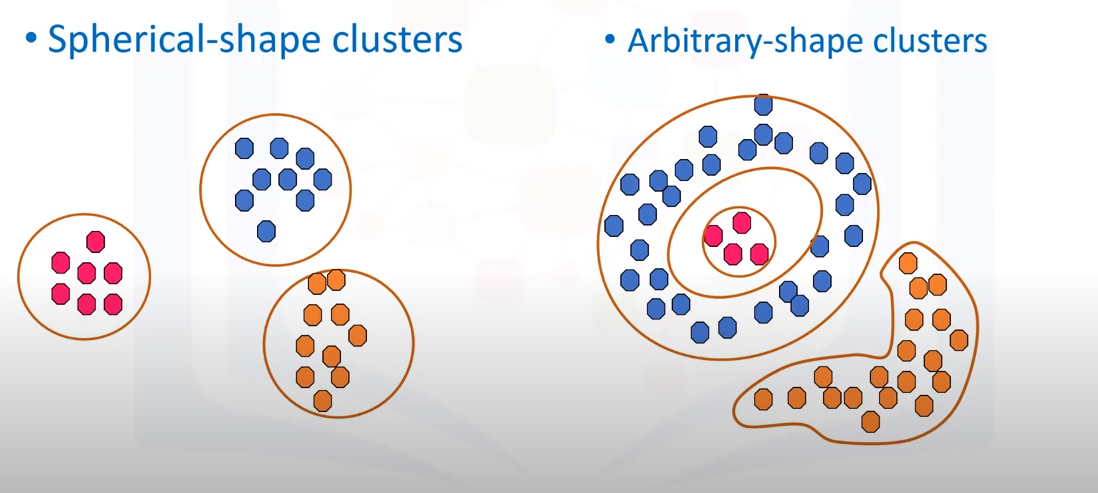

### How DBScan Works?


Consider a set of points in some space to be clustered. Let **R be a parameter specifying the radius of a neighborhood with respect to some point** and let **M be minimum number of points we want in a neighbourhood to define a cluster**. 

<img src='DBScan.PNG' width="800"/>


For the purpose of DBSCAN clustering, the points are classified as **core points**, **border points** and **outliers**, as follows:

* A point p is a **core point** if at least M points are within distance R of it (including p).
* A point s is a **border point** if it is near a core point but doesn't have M points in its R neighbourhood.
* A point q is **directly density-reachable** from p if point q is within distance R from core point p. Points are only said to be directly reachable from core points.
* A point t is **density-reachable** from p if there is a path p1, ..., pn with p1 = p and pn = t, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of t. In the image below point t is density reachable from point p via point q.
* All points in this chain path p1, ..., pn are called **density connected**.
* All points not reachable from any other point are **outliers or noise points**.

Now if p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points.

<img src='https://www.mdpi.com/applsci/applsci-09-04398/article_deploy/html/images/applsci-09-04398-g001.png' />

### Advantages of DBScan


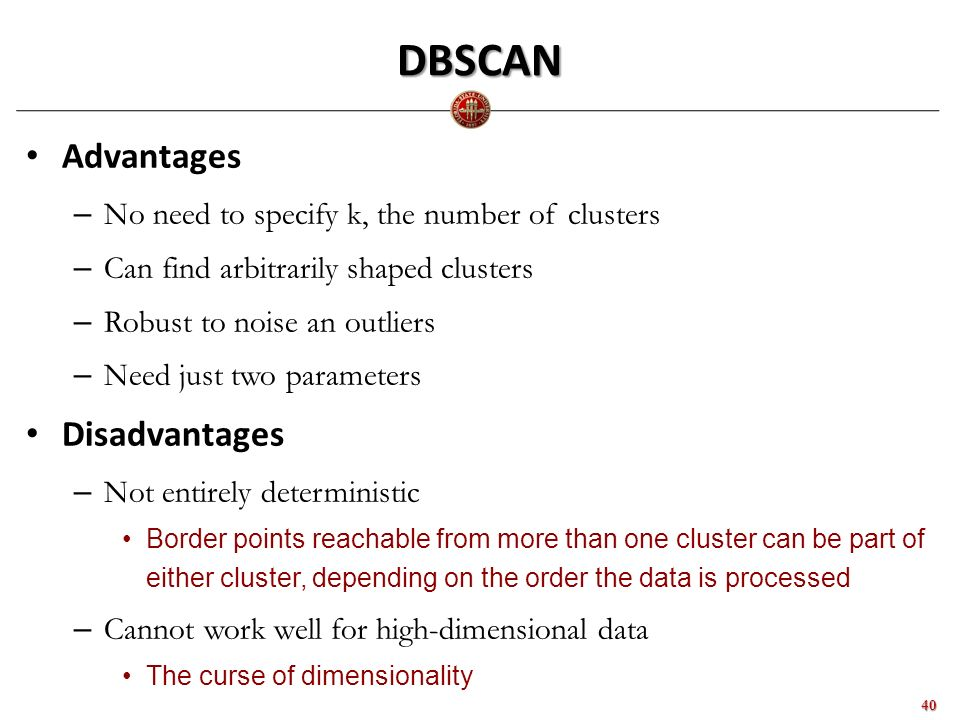

In [ ]:
display.Image("https://images.slideplayer.com/35/10431363/slides/slide_41.jpg", width = 600, height = 500)


## Demo: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


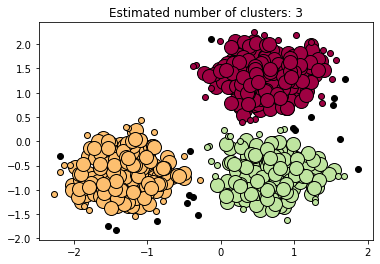

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()